In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score

# EDA

In [2]:
bmw_data = pd.read_csv("../data/bmw_encoded.csv")
bmw_data

,Серия,Поколение,Год,Рестайлинг,Пробег,Коробка,Объем,Цена,Кузов_внедорожник 5 дв.,Кузов_кабриолет,Кузов_купе,Кузов_лифтбек,Кузов_минивэн,Кузов_седан,Кузов_универсал,Кузов_хэтчбек 3 дв.,Кузов_хэтчбек 5 дв.,Топливо_бензин,Топливо_дизель
0,17140,22517,2019,0,129000,1,1.5,16999,0,0,0,0,0,0,0,0,1,0,1
1,20542,40126,2019,1,35000,2,3.0,83777,0,0,0,0,0,1,0,0,0,0,1
2,17574,7029,1999,0,400000,0,2.5,3399,0,0,0,0,0,1,0,0,0,0,1
3,17681,13564,2005,0,370000,2,2.0,7200,0,0,0,0,0,0,0,0,1,1,0
4,39427,21047,2012,1,149000,2,3.0,23450,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,15881,36993,2022,1,8540,2,3.0,59990,0,0,0,0,0,1,0,0,0,1,0
2609,38714,21047,2011,0,277000,2,3.0,22290,1,0,0,0,0,0,0,0,0,0,1
2610,17574,20410,2012,0,256000,2,3.0,23500,0,0,0,0,0,1,0,0,0,0,1
2611,38991,26413,2013,0,268500,2,2.0,21500,0,0,1,0,0,0,0,0,0,1,0


In [3]:
bmw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Серия                    2613 non-null   int64  
 1   Поколение                2613 non-null   int64  
 2   Год                      2613 non-null   int64  
 3   Рестайлинг               2613 non-null   int64  
 4   Пробег                   2613 non-null   int64  
 5   Коробка                  2613 non-null   int64  
 6   Объем                    2613 non-null   float64
 7   Цена                     2613 non-null   int64  
 8   Кузов_внедорожник 5 дв.  2613 non-null   int64  
 9   Кузов_кабриолет          2613 non-null   int64  
 10  Кузов_купе               2613 non-null   int64  
 11  Кузов_лифтбек            2613 non-null   int64  
 12  Кузов_минивэн            2613 non-null   int64  
 13  Кузов_седан              2613 non-null   int64  
 14  Кузов_универсал         

,Серия,Поколение,Объем,Год
Серия,1.000000,0.639916,0.297926,0.372197
Поколение,0.639916,1.000000,0.138139,0.769333
Объем,0.297926,0.138139,1.000000,-0.153404
Год,0.372197,0.769333,-0.153404,1.000000


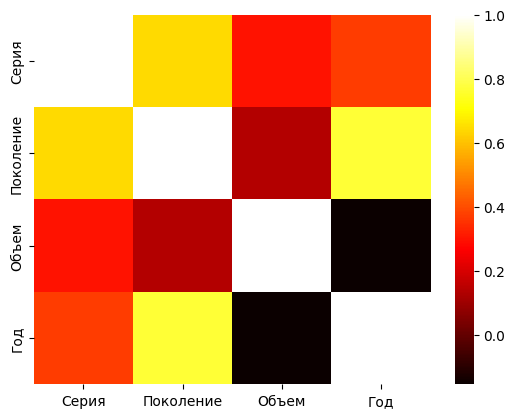

In [4]:
corr_bmw = bmw_data[["Серия", "Поколение", "Объем", "Год"]].corr()
sns.heatmap(corr_bmw, cmap="hot")
corr_bmw

# Модели

## Линейная регрессия

In [5]:
X = bmw_data.drop(["Цена"], axis=1).values
y = bmw_data["Цена"].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.856427806897845

In [8]:
poly_ft = PolynomialFeatures(degree=2)
X_poly = poly_ft.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=41)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9388561451692249

In [9]:
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.85541407, 0.88647776, 0.87270761, 0.86596928, 0.90547152])

In [10]:
model.predict(X_test[100:120]) - y_test[100:120]

array([ 1505.23030533,  -661.16493913,  1758.55239168,  1873.30619402,
       -1463.77407519,  2294.9769783 ,   809.92097135,   583.25801845,
        2631.76986328, -2103.06286333,  7194.54633623, -4545.43105093,
        7165.66564792, -3615.77677601,   272.12996986, -1164.40191711,
        1930.82039641,  2533.69151743,  2498.63620903,  2597.59213793])

## Дерево решений

In [11]:
X = bmw_data.drop(["Цена"], axis=1).values
y = bmw_data["Цена"].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [13]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.908459588965837

In [14]:
poly_ft = PolynomialFeatures(degree=2)
X_poly = poly_ft.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=41)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9130514983953031

In [15]:
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.93340685, 0.87794043, 0.90427314, 0.91356664, 0.90798378])

In [16]:
model.predict(X_test[100:120]) - y_test[100:120]

array([ -8900.,  -2300.,  -3960.,    800.,    500.,  12300.,    500.,
         6630.,   3500.,  -1600.,   6300.,  -5200., -12499., -10600.,
         4800.,    800.,   4001.,   -250.,  -3200.,   4723.])

In [17]:
np.array((model.predict(X_test[100:120]), y_test[100:120])).T

array([[39900., 48800.],
       [ 3500.,  5800.],
       [39990., 43950.],
       [ 5000.,  4200.],
       [ 6500.,  6000.],
       [34000., 21700.],
       [ 5000.,  4500.],
       [25600., 18970.],
       [16000., 12500.],
       [11300., 12900.],
       [59300., 53000.],
       [32800., 38000.],
       [60500., 72999.],
       [38900., 49500.],
       [19800., 15000.],
       [24300., 23500.],
       [44000., 39999.],
       [18750., 19000.],
       [ 6800., 10000.],
       [48500., 43777.]])